In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *
import random

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 7
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)
random.seed(seed)
trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, lr_reasoner=0.00025, identities_weight=0.2)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 0/7 | batch 2001/2000 | loss 2.1255 | val loss 0.7716 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 30.56s
train epoch 1/7 | batch 2001/2000 | loss 1.1878 | val loss 0.5557 | acc 0.7050 | f1 0.4076 | prec 0.3563 | recall 0.4762 | roc auc 0.6770 | pr auc 0.4902 | elapsed 84.53s
train epoch 2/7 | batch 2001/2000 | loss 0.8073 | val loss 0.4764 | acc 0.7684 | f1 0.5401 | prec 0.4682 | recall 0.6381 | roc auc 0.7921 | pr auc 0.6356 | elapsed 87.95s
train epoch 3/7 | batch 2001/2000 | loss 0.5972 | val loss 0.3902 | acc 0.8257 | f1 0.6384 | prec 0.5723 | recall 0.7217 | roc auc 0.8614 | pr auc 0.7584 | elapsed 85.02s
train epoch 4/7 | batch 2001/2000 | loss 0.4449 | val loss 0.3478 | acc 0.8562 | f1 0.6936 | prec 0.6355 | recall 0.7633 | roc auc 0.8920 | pr auc 0.8133 | elapsed 80.34s
train epoch 5/7 | batch 2001/2000 | loss 0.3515 | val loss 0.

In [4]:
train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=6, batch_size=batch_size, identities_weight=0.006, lr_reasoner=0.00006)

train epoch 0/6 | batch 0001/2000 | loss 0.0597 | elapsed 0.03s

train epoch 0/6 | batch 2001/2000 | loss 0.1513 | val loss 0.2951 | acc 0.8909 | f1 0.7551 | prec 0.7237 | recall 0.7894 | roc auc 0.9263 | pr auc 0.8655 | elapsed 61.98s
train epoch 1/6 | batch 2001/2000 | loss 0.1479 | val loss 0.2390 | acc 0.9161 | f1 0.7999 | prec 0.8137 | recall 0.7865 | roc auc 0.9405 | pr auc 0.8905 | elapsed 83.64s
train epoch 2/6 | batch 2001/2000 | loss 0.1212 | val loss 0.2295 | acc 0.9194 | f1 0.8090 | prec 0.8176 | recall 0.8006 | roc auc 0.9456 | pr auc 0.8988 | elapsed 73.83s
train epoch 3/6 | batch 2001/2000 | loss 0.1082 | val loss 0.2241 | acc 0.9213 | f1 0.8143 | prec 0.8184 | recall 0.8103 | roc auc 0.9488 | pr auc 0.9043 | elapsed 85.07s
train epoch 4/6 | batch 2001/2000 | loss 0.0982 | val loss 0.2212 | acc 0.9239 | f1 0.8202 | prec 0.8266 | recall 0.8138 | roc auc 0.9509 | pr auc 0.9080 | elapsed 88.13s
train epoch 5/6 | batch 2001/2000 | loss 0.0901 | val loss 0.2219 | acc 0.9237 | f1 0.8214 | prec 0.8200 | recall 0.8229 | roc auc 0.9525 | pr au

In [5]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)
    #else:
        #train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.2183 | val loss 1.2183 | acc 0.6630 | f1 0.4028 | prec 0.3276 | recall 0.5227 | roc auc 0.6552 | pr auc 0.4636 | elapsed 14.89s
train epoch 01/10 | batch 1251/1250 | loss 1.0215 | val loss 0.7927 | acc 0.7468 | f1 0.4892 | prec 0.4356 | recall 0.5578 | roc auc 0.7418 | pr auc 0.5616 | elapsed 33.14s
train epoch 02/10 | batch 1251/1250 | loss 0.6692 | val loss 0.5169 | acc 0.8185 | f1 0.5948 | prec 0.5780 | recall 0.6125 | roc auc 0.8256 | pr auc 0.6774 | elapsed 27.25s
train epoch 03/10 | batch 1251/1250 | loss 0.4487 | val loss 0.3529 | acc 0.8702 | f1 0.6930 | prec 0.7132 | recall 0.6739 | roc auc 0.8898 | pr auc 0.7849 | elapsed 26.59s
train epoch 04/10 | batch 1251/1250 | loss 0.3180 | val loss 0.2569 | acc 0.9052 | f1 0.7710 | prec 0.8118 | recall 0.7341 | roc auc 0.9307 | pr auc 0.8605 | elapsed 28.42s
train epoch 05/10 | batch 1251/1250 | loss 0.2404 | val loss 0.1992 | acc 0.9272 | f1 0.8229 | prec 0.8735 | recall 0.

In [18]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=test_epoch_count, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)


train epoch 00/10 | batch 1251/1250 | loss 0.0955 | val loss 0.0956 | acc 0.9647 | f1 0.9154 | prec 0.9572 | recall 0.8771 | roc auc 0.9897 | pr auc 0.9749 | elapsed 24.32s
train epoch 01/10 | batch 1251/1250 | loss 0.1059 | val loss 0.0855 | acc 0.9684 | f1 0.9240 | prec 0.9672 | recall 0.8844 | roc auc 0.9913 | pr auc 0.9788 | elapsed 32.81s
train epoch 02/10 | batch 1251/1250 | loss 0.0898 | val loss 0.0783 | acc 0.9713 | f1 0.9315 | prec 0.9685 | recall 0.8972 | roc auc 0.9930 | pr auc 0.9824 | elapsed 33.30s
train epoch 03/10 | batch 1251/1250 | loss 0.0830 | val loss 0.0728 | acc 0.9730 | f1 0.9358 | prec 0.9694 | recall 0.9044 | roc auc 0.9943 | pr auc 0.9850 | elapsed 33.13s
train epoch 04/10 | batch 1251/1250 | loss 0.0775 | val loss 0.0685 | acc 0.9751 | f1 0.9409 | prec 0.9715 | recall 0.9123 | roc auc 0.9951 | pr auc 0.9870 | elapsed 34.23s
train epoch 05/10 | batch 1251/1250 | loss 0.0732 | val loss 0.0649 | acc 0.9762 | f1 0.9437 | prec 0.9736 | recall 0.9156 | roc auc 0.

In [21]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=5, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)


train epoch 0/5 | batch 1251/1250 | loss 0.0523 | val loss 0.0524 | acc 0.9812 | f1 0.9557 | prec 0.9777 | recall 0.9347 | roc auc 0.9977 | pr auc 0.9932 | elapsed 25.41s
train epoch 1/5 | batch 1251/1250 | loss 0.0644 | val loss 0.0523 | acc 0.9806 | f1 0.9542 | prec 0.9805 | recall 0.9293 | roc auc 0.9973 | pr auc 0.9924 | elapsed 36.23s
train epoch 2/5 | batch 1251/1250 | loss 0.0565 | val loss 0.0496 | acc 0.9825 | f1 0.9588 | prec 0.9796 | recall 0.9389 | roc auc 0.9977 | pr auc 0.9933 | elapsed 35.23s
train epoch 3/5 | batch 1251/1250 | loss 0.0538 | val loss 0.0477 | acc 0.9836 | f1 0.9614 | prec 0.9807 | recall 0.9428 | roc auc 0.9979 | pr auc 0.9940 | elapsed 33.96s
train epoch 4/5 | batch 1251/1250 | loss 0.0519 | val loss 0.0461 | acc 0.9840 | f1 0.9626 | prec 0.9809 | recall 0.9450 | roc auc 0.9982 | pr auc 0.9946 | elapsed 33.21s
train epoch 5/5 | batch 1251/1250 | loss 0.0503 | val loss 0.0447 | acc 0.9848 | f1 0.9644 | prec 0.9809 | recall 0.9485 | roc auc 0.9983 | pr au

In [22]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=10, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)


train epoch 00/10 | batch 1251/1250 | loss 0.0447 | val loss 0.0448 | acc 0.9848 | f1 0.9643 | prec 0.9810 | recall 0.9483 | roc auc 0.9983 | pr auc 0.9950 | elapsed 28.19s
train epoch 01/10 | batch 1251/1250 | loss 0.0562 | val loss 0.0457 | acc 0.9834 | f1 0.9610 | prec 0.9826 | recall 0.9403 | roc auc 0.9979 | pr auc 0.9941 | elapsed 36.64s
train epoch 02/10 | batch 1251/1250 | loss 0.0495 | val loss 0.0435 | acc 0.9846 | f1 0.9639 | prec 0.9821 | recall 0.9464 | roc auc 0.9982 | pr auc 0.9948 | elapsed 33.94s
train epoch 03/10 | batch 1251/1250 | loss 0.0474 | val loss 0.0419 | acc 0.9859 | f1 0.9669 | prec 0.9831 | recall 0.9512 | roc auc 0.9984 | pr auc 0.9953 | elapsed 33.90s
train epoch 04/10 | batch 1251/1250 | loss 0.0459 | val loss 0.0407 | acc 0.9863 | f1 0.9681 | prec 0.9827 | recall 0.9539 | roc auc 0.9986 | pr auc 0.9957 | elapsed 32.82s
train epoch 05/10 | batch 1251/1250 | loss 0.0446 | val loss 0.0397 | acc 0.9867 | f1 0.9690 | prec 0.9825 | recall 0.9558 | roc auc 0.

In [23]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=10, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/10 | batch 1251/1250 | loss 0.0355 | val loss 0.0355 | acc 0.9886 | f1 0.9734 | prec 0.9858 | recall 0.9612 | roc auc 0.9991 | pr auc 0.9971 | elapsed 26.92s
train epoch 01/10 | batch 1251/1250 | loss 0.0456 | val loss 0.0367 | acc 0.9873 | f1 0.9703 | prec 0.9878 | recall 0.9533 | roc auc 0.9988 | pr auc 0.9964 | elapsed 33.70s
train epoch 02/10 | batch 1251/1250 | loss 0.0402 | val loss 0.0352 | acc 0.9886 | f1 0.9733 | prec 0.9877 | recall 0.9593 | roc auc 0.9990 | pr auc 0.9968 | elapsed 35.32s
train epoch 03/10 | batch 1251/1250 | loss 0.0386 | val loss 0.0341 | acc 0.9889 | f1 0.9740 | prec 0.9868 | recall 0.9616 | roc auc 0.9991 | pr auc 0.9971 | elapsed 34.72s
train epoch 04/10 | batch 1251/1250 | loss 0.0377 | val loss 0.0333 | acc 0.9895 | f1 0.9754 | prec 0.9874 | recall 0.9638 | roc auc 0.9992 | pr auc 0.9974 | elapsed 31.68s
train epoch 05/10 | batch 1251/1250 | loss 0.0368 | val loss 0.0326 | acc 0.9896 | f1 0.9757 | prec 0.9874 | recall 0.9644 | roc auc 0.

In [24]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=15, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/15 | batch 1251/1250 | loss 0.0296 | val loss 0.0297 | acc 0.9908 | f1 0.9785 | prec 0.9895 | recall 0.9677 | roc auc 0.9995 | pr auc 0.9982 | elapsed 28.62s
train epoch 01/15 | batch 1251/1250 | loss 0.0388 | val loss 0.0310 | acc 0.9896 | f1 0.9757 | prec 0.9906 | recall 0.9612 | roc auc 0.9992 | pr auc 0.9976 | elapsed 34.39s
train epoch 02/15 | batch 1251/1250 | loss 0.0340 | val loss 0.0296 | acc 0.9907 | f1 0.9783 | prec 0.9895 | recall 0.9672 | roc auc 0.9993 | pr auc 0.9979 | elapsed 34.43s
train epoch 03/15 | batch 1251/1250 | loss 0.0327 | val loss 0.0287 | acc 0.9912 | f1 0.9796 | prec 0.9906 | recall 0.9688 | roc auc 0.9994 | pr auc 0.9981 | elapsed 35.96s
train epoch 04/15 | batch 1251/1250 | loss 0.0319 | val loss 0.0280 | acc 0.9915 | f1 0.9803 | prec 0.9904 | recall 0.9703 | roc auc 0.9995 | pr auc 0.9983 | elapsed 34.07s
train epoch 05/15 | batch 1251/1250 | loss 0.0312 | val loss 0.0275 | acc 0.9919 | f1 0.9813 | prec 0.9911 | recall 0.9717 | roc auc 0.

In [25]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=20, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/20 | batch 1251/1250 | loss 0.0232 | val loss 0.0232 | acc 0.9939 | f1 0.9858 | prec 0.9927 | recall 0.9790 | roc auc 0.9997 | pr auc 0.9991 | elapsed 28.21s
train epoch 01/20 | batch 1251/1250 | loss 0.0309 | val loss 0.0244 | acc 0.9924 | f1 0.9823 | prec 0.9935 | recall 0.9714 | roc auc 0.9996 | pr auc 0.9987 | elapsed 36.39s
train epoch 02/20 | batch 1251/1250 | loss 0.0269 | val loss 0.0232 | acc 0.9934 | f1 0.9846 | prec 0.9934 | recall 0.9760 | roc auc 0.9996 | pr auc 0.9989 | elapsed 37.52s
train epoch 03/20 | batch 1251/1250 | loss 0.0258 | val loss 0.0225 | acc 0.9938 | f1 0.9856 | prec 0.9928 | recall 0.9786 | roc auc 0.9997 | pr auc 0.9990 | elapsed 36.75s
train epoch 04/20 | batch 1251/1250 | loss 0.0252 | val loss 0.0220 | acc 0.9942 | f1 0.9866 | prec 0.9931 | recall 0.9802 | roc auc 0.9997 | pr auc 0.9991 | elapsed 29.73s
train epoch 05/20 | batch 1251/1250 | loss 0.0247 | val loss 0.0216 | acc 0.9944 | f1 0.9870 | prec 0.9936 | recall 0.9806 | roc auc 0.

In [26]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=35, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/35 | batch 1251/1250 | loss 0.0169 | val loss 0.0169 | acc 0.9964 | f1 0.9918 | prec 0.9966 | recall 0.9870 | roc auc 0.9999 | pr auc 0.9997 | elapsed 29.81s
train epoch 01/35 | batch 1251/1250 | loss 0.0234 | val loss 0.0179 | acc 0.9950 | f1 0.9885 | prec 0.9967 | recall 0.9803 | roc auc 0.9998 | pr auc 0.9994 | elapsed 38.69s
train epoch 02/35 | batch 1251/1250 | loss 0.0200 | val loss 0.0170 | acc 0.9958 | f1 0.9902 | prec 0.9960 | recall 0.9845 | roc auc 0.9999 | pr auc 0.9995 | elapsed 37.29s
train epoch 03/35 | batch 1251/1250 | loss 0.0191 | val loss 0.0165 | acc 0.9963 | f1 0.9914 | prec 0.9961 | recall 0.9868 | roc auc 0.9999 | pr auc 0.9996 | elapsed 40.33s
train epoch 04/35 | batch 1251/1250 | loss 0.0185 | val loss 0.0161 | acc 0.9965 | f1 0.9920 | prec 0.9965 | recall 0.9875 | roc auc 0.9999 | pr auc 0.9997 | elapsed 40.97s
train epoch 05/35 | batch 1251/1250 | loss 0.0182 | val loss 0.0158 | acc 0.9968 | f1 0.9926 | prec 0.9968 | recall 0.9885 | roc auc 0.

In [27]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=30, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/30 | batch 1251/1250 | loss 0.0097 | val loss 0.0097 | acc 0.9988 | f1 0.9973 | prec 0.9986 | recall 0.9960 | roc auc 1.0000 | pr auc 1.0000 | elapsed 28.10s
train epoch 01/30 | batch 1251/1250 | loss 0.0138 | val loss 0.0103 | acc 0.9978 | f1 0.9948 | prec 0.9985 | recall 0.9911 | roc auc 1.0000 | pr auc 0.9999 | elapsed 37.94s
train epoch 02/30 | batch 1251/1250 | loss 0.0116 | val loss 0.0098 | acc 0.9984 | f1 0.9963 | prec 0.9986 | recall 0.9940 | roc auc 1.0000 | pr auc 0.9999 | elapsed 35.62s
train epoch 03/30 | batch 1251/1250 | loss 0.0111 | val loss 0.0095 | acc 0.9988 | f1 0.9972 | prec 0.9986 | recall 0.9957 | roc auc 1.0000 | pr auc 0.9999 | elapsed 37.84s
train epoch 04/30 | batch 1251/1250 | loss 0.0108 | val loss 0.0093 | acc 0.9989 | f1 0.9975 | prec 0.9988 | recall 0.9962 | roc auc 1.0000 | pr auc 0.9999 | elapsed 44.98s
train epoch 05/30 | batch 1251/1250 | loss 0.0105 | val loss 0.0091 | acc 0.9989 | f1 0.9975 | prec 0.9987 | recall 0.9962 | roc auc 1.

In [28]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=50, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/50 | batch 1251/1250 | loss 0.0060 | val loss 0.0060 | acc 0.9995 | f1 0.9989 | prec 0.9998 | recall 0.9980 | roc auc 1.0000 | pr auc 1.0000 | elapsed 30.24s
train epoch 01/50 | batch 1251/1250 | loss 0.0088 | val loss 0.0064 | acc 0.9992 | f1 0.9982 | prec 0.9995 | recall 0.9969 | roc auc 1.0000 | pr auc 1.0000 | elapsed 37.73s
train epoch 02/50 | batch 1251/1250 | loss 0.0072 | val loss 0.0060 | acc 0.9994 | f1 0.9986 | prec 0.9995 | recall 0.9976 | roc auc 1.0000 | pr auc 1.0000 | elapsed 37.65s
train epoch 03/50 | batch 1251/1250 | loss 0.0068 | val loss 0.0058 | acc 0.9994 | f1 0.9987 | prec 0.9997 | recall 0.9977 | roc auc 1.0000 | pr auc 1.0000 | elapsed 35.74s
train epoch 04/50 | batch 1251/1250 | loss 0.0067 | val loss 0.0057 | acc 0.9995 | f1 0.9989 | prec 0.9997 | recall 0.9982 | roc auc 1.0000 | pr auc 1.0000 | elapsed 34.91s
train epoch 05/50 | batch 1251/1250 | loss 0.0066 | val loss 0.0056 | acc 0.9995 | f1 0.9988 | prec 0.9997 | recall 0.9980 | roc auc 1.

In [29]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=40, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/40 | batch 1251/1250 | loss 0.0027 | val loss 0.0027 | acc 1.0000 | f1 0.9999 | prec 1.0000 | recall 0.9998 | roc auc 1.0000 | pr auc 1.0000 | elapsed 33.37s
train epoch 01/40 | batch 1251/1250 | loss 0.0040 | val loss 0.0028 | acc 0.9998 | f1 0.9994 | prec 1.0000 | recall 0.9989 | roc auc 1.0000 | pr auc 1.0000 | elapsed 43.39s
train epoch 02/40 | batch 1251/1250 | loss 0.0032 | val loss 0.0027 | acc 0.9999 | f1 0.9997 | prec 1.0000 | recall 0.9993 | roc auc 1.0000 | pr auc 1.0000 | elapsed 45.11s
train epoch 03/40 | batch 1251/1250 | loss 0.0031 | val loss 0.0026 | acc 0.9999 | f1 0.9997 | prec 1.0000 | recall 0.9994 | roc auc 1.0000 | pr auc 1.0000 | elapsed 44.14s
train epoch 04/40 | batch 1251/1250 | loss 0.0030 | val loss 0.0026 | acc 0.9999 | f1 0.9997 | prec 1.0000 | recall 0.9994 | roc auc 1.0000 | pr auc 1.0000 | elapsed 45.42s
train epoch 05/40 | batch 1251/1250 | loss 0.0030 | val loss 0.0025 | acc 0.9999 | f1 0.9998 | prec 1.0000 | recall 0.9997 | roc auc 1.

In [30]:
train_mod(data_te, None, trained_reasoner, trained_test_encoders['trained reasoner'], epoch_count=50, batch_size=batch_size, freeze_reasoner=True, logger=test_logger)

train epoch 00/50 | batch 1251/1250 | loss 0.0014 | val loss 0.0014 | acc 1.0000 | f1 1.0000 | prec 1.0000 | recall 1.0000 | roc auc 1.0000 | pr auc 1.0000 | elapsed 21.76s
train epoch 01/50 | batch 1251/1250 | loss 0.0020 | val loss 0.0015 | acc 1.0000 | f1 0.9999 | prec 1.0000 | recall 0.9999 | roc auc 1.0000 | pr auc 1.0000 | elapsed 28.11s
train epoch 02/50 | batch 1251/1250 | loss 0.0017 | val loss 0.0014 | acc 1.0000 | f1 1.0000 | prec 1.0000 | recall 1.0000 | roc auc 1.0000 | pr auc 1.0000 | elapsed 27.74s
train epoch 03/50 | batch 1251/1250 | loss 0.0016 | val loss 0.0014 | acc 1.0000 | f1 1.0000 | prec 1.0000 | recall 1.0000 | roc auc 1.0000 | pr auc 1.0000 | elapsed 26.74s
train epoch 04/50 | batch 1251/1250 | loss 0.0016 | val loss 0.0013 | acc 1.0000 | f1 1.0000 | prec 1.0000 | recall 1.0000 | roc auc 1.0000 | pr auc 1.0000 | elapsed 27.06s
train epoch 05/50 | batch 1251/1250 | loss 0.0016 | val loss 0.0013 | acc 1.0000 | f1 1.0000 | prec 1.0000 | recall 1.0000 | roc auc 1.

In [31]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    #_, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240709T142704


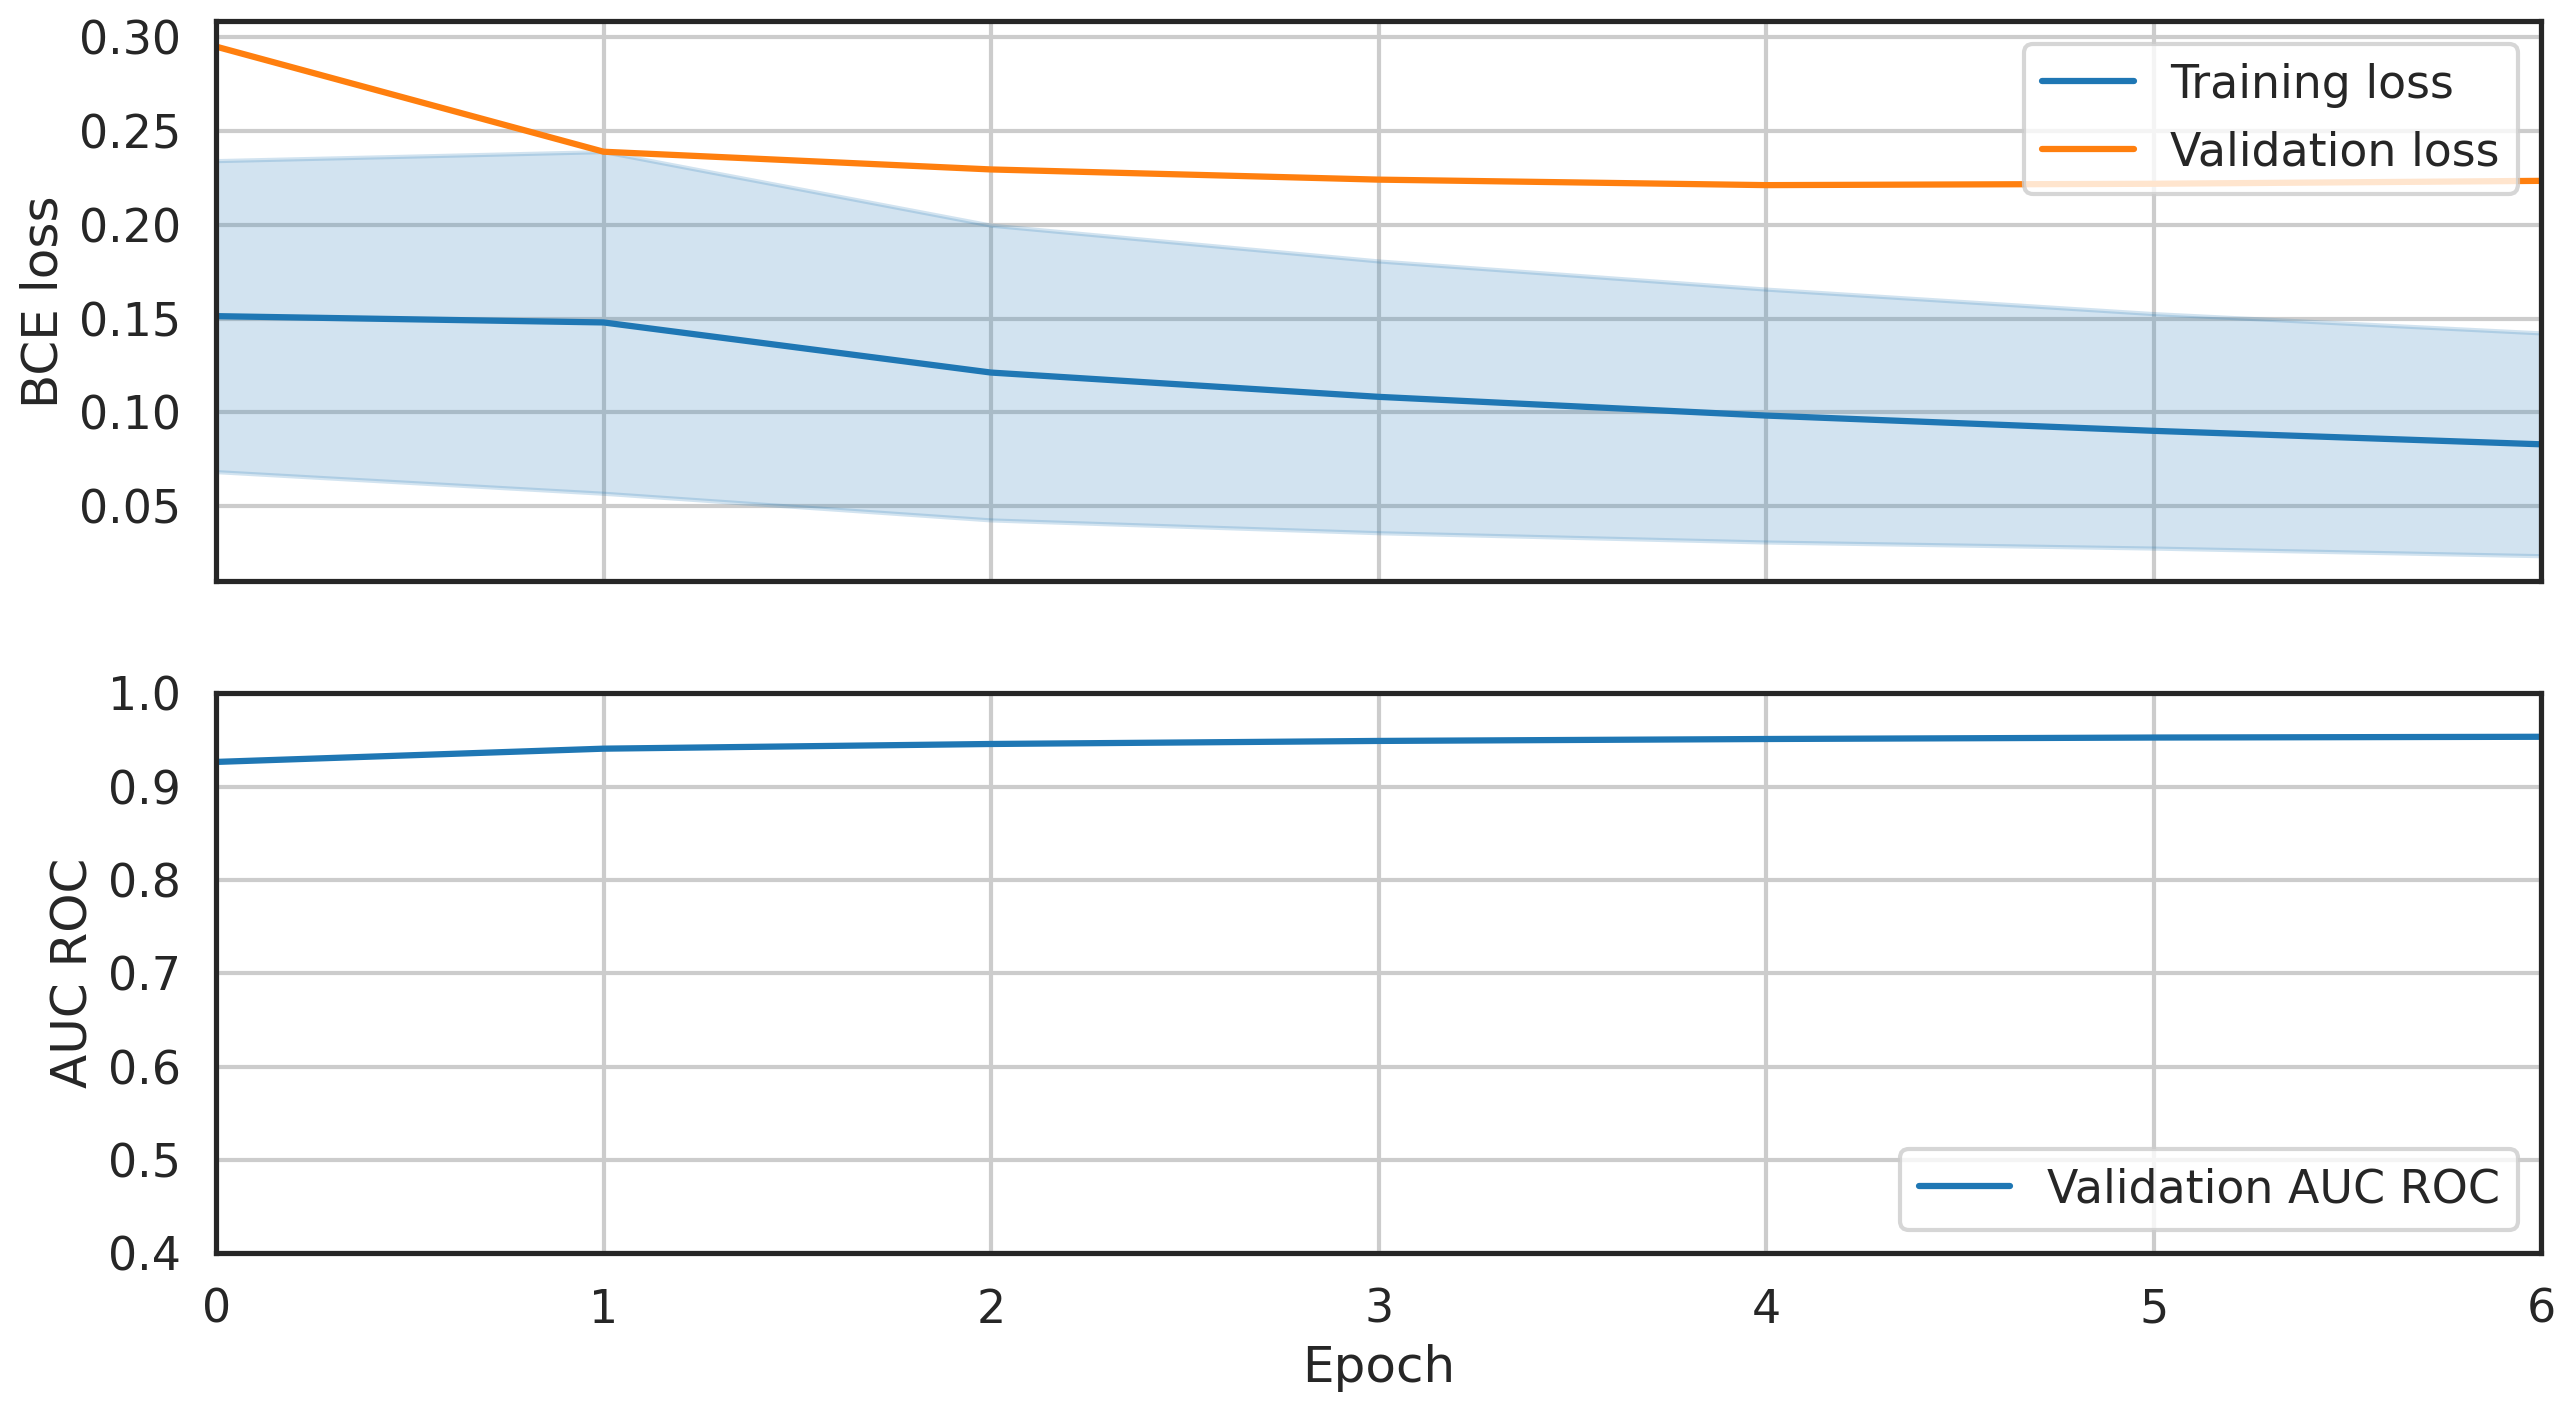

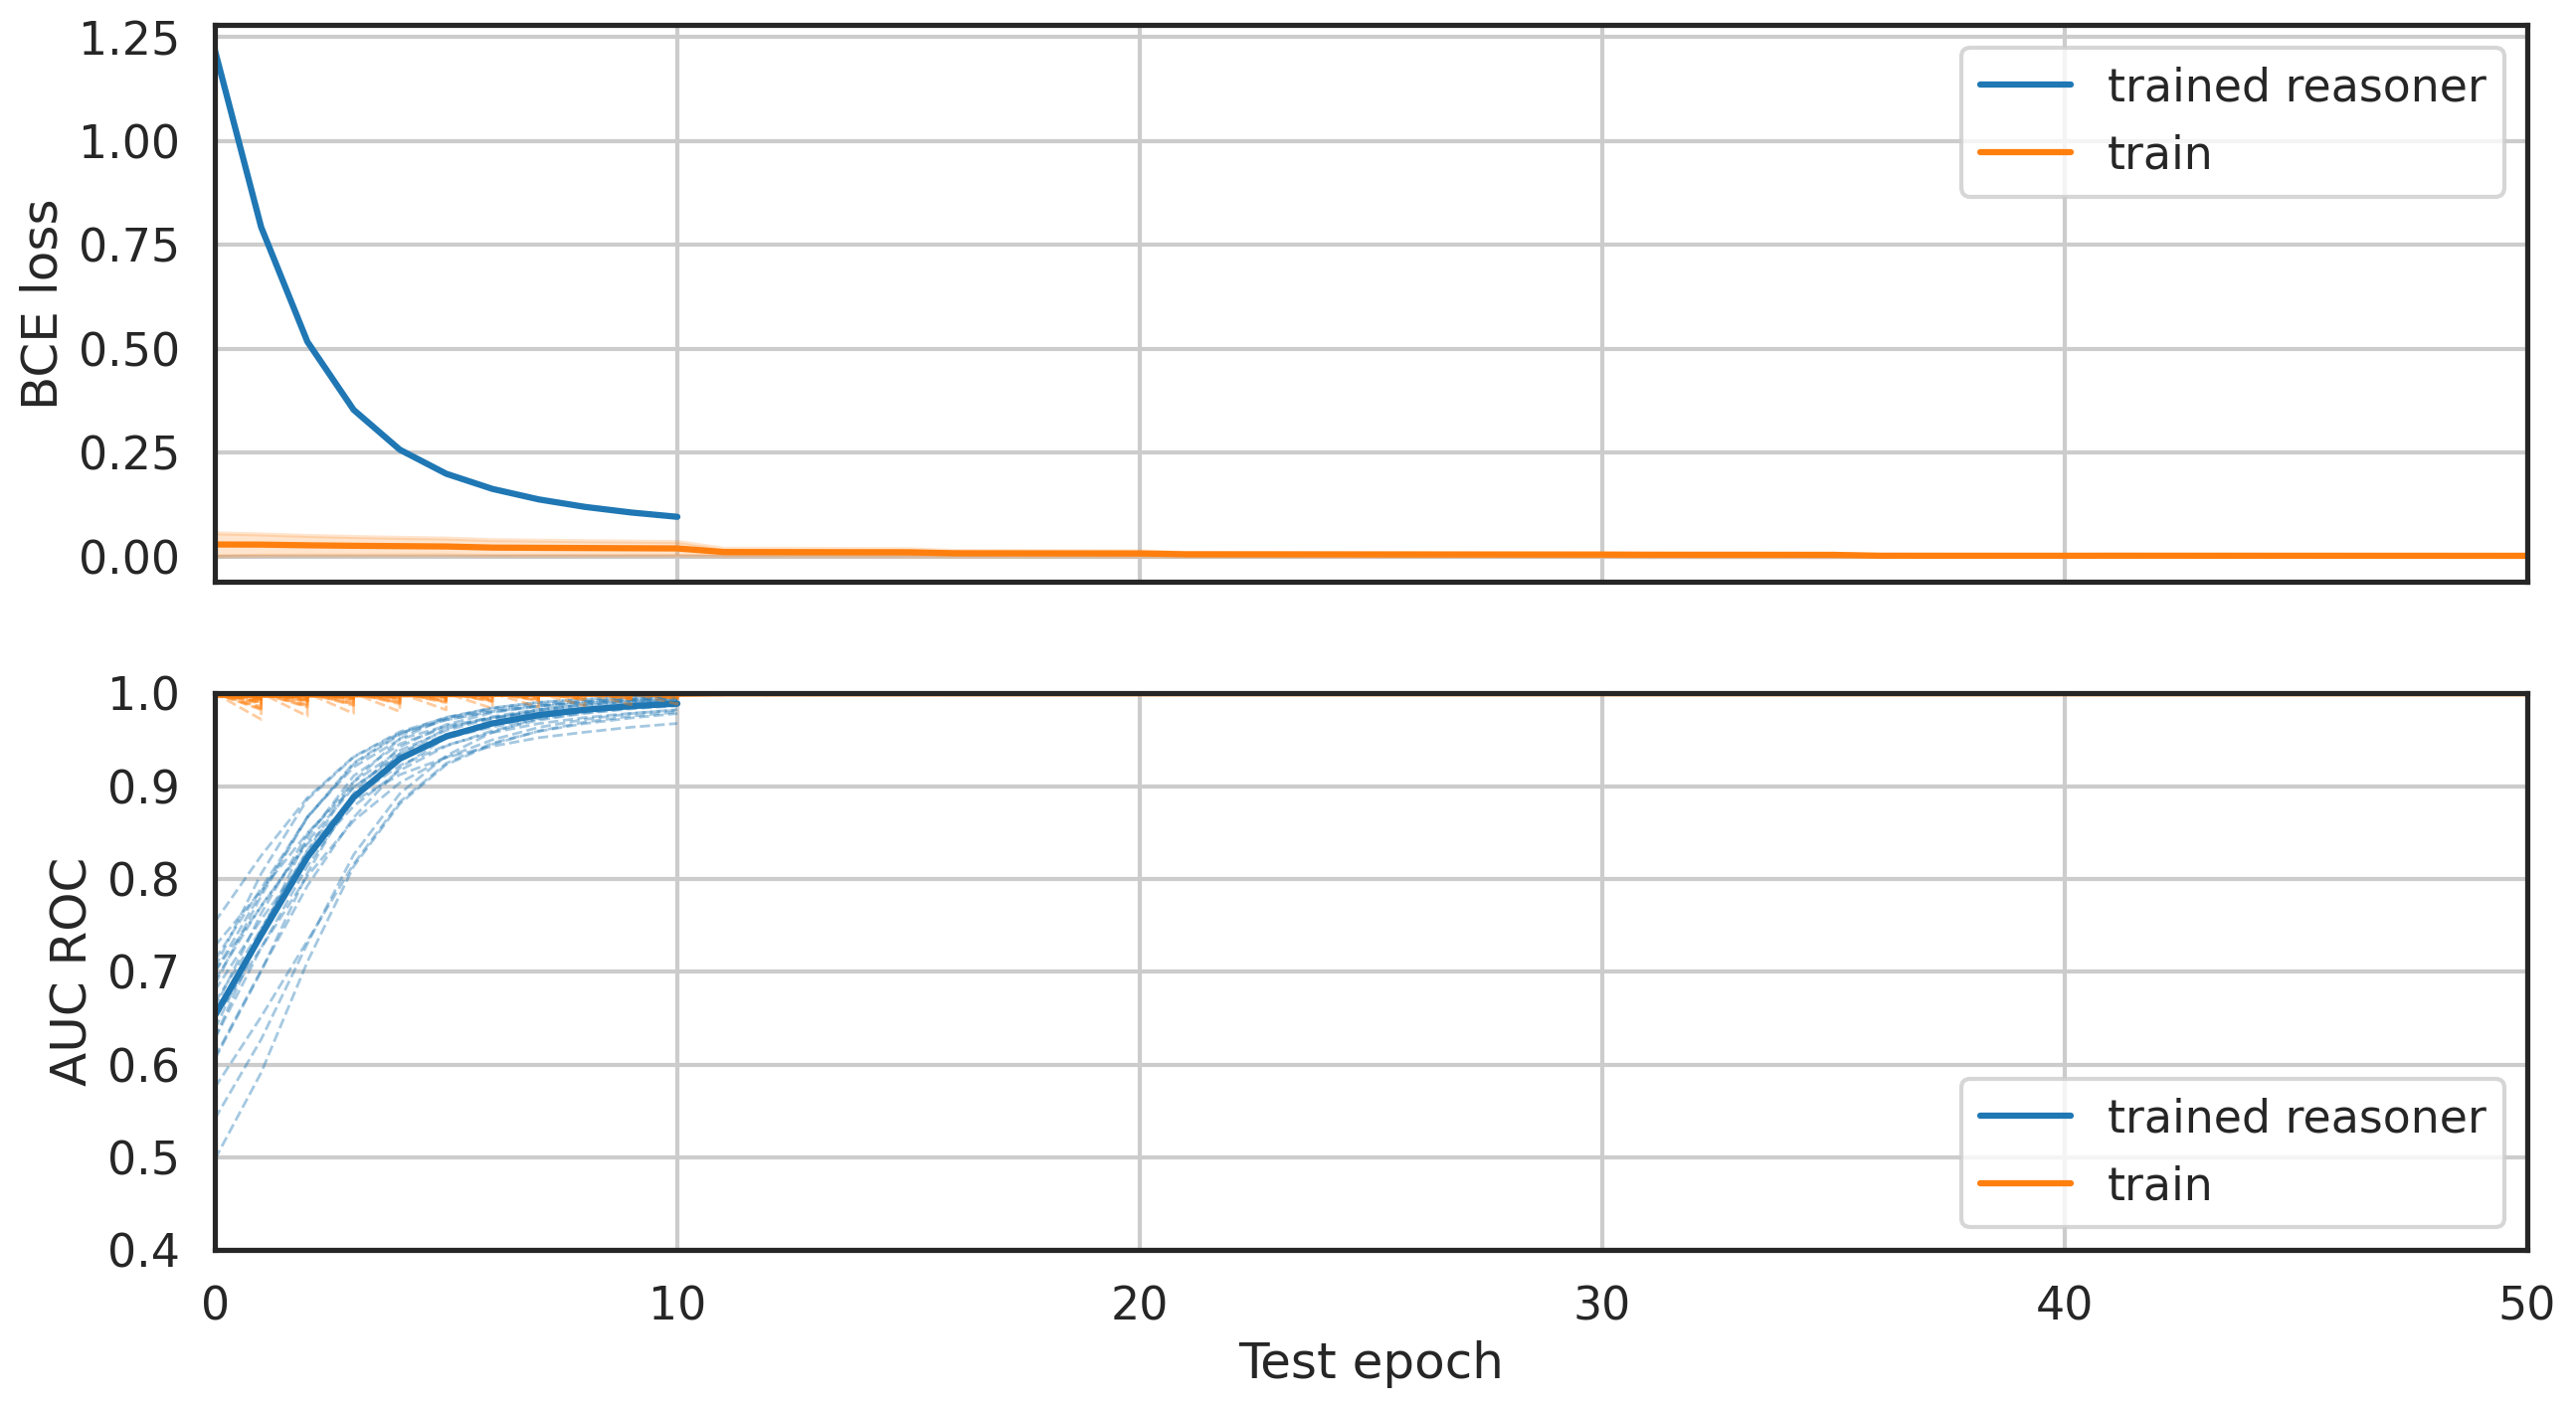

         mean  std  micro
acc       1.0  0.0    1.0
prec      1.0  0.0    1.0
recall    1.0  0.0    1.0
f1        1.0  0.0    1.0
auc_roc   1.0  0.0    1.0
auc_pr    1.0  0.0    1.0


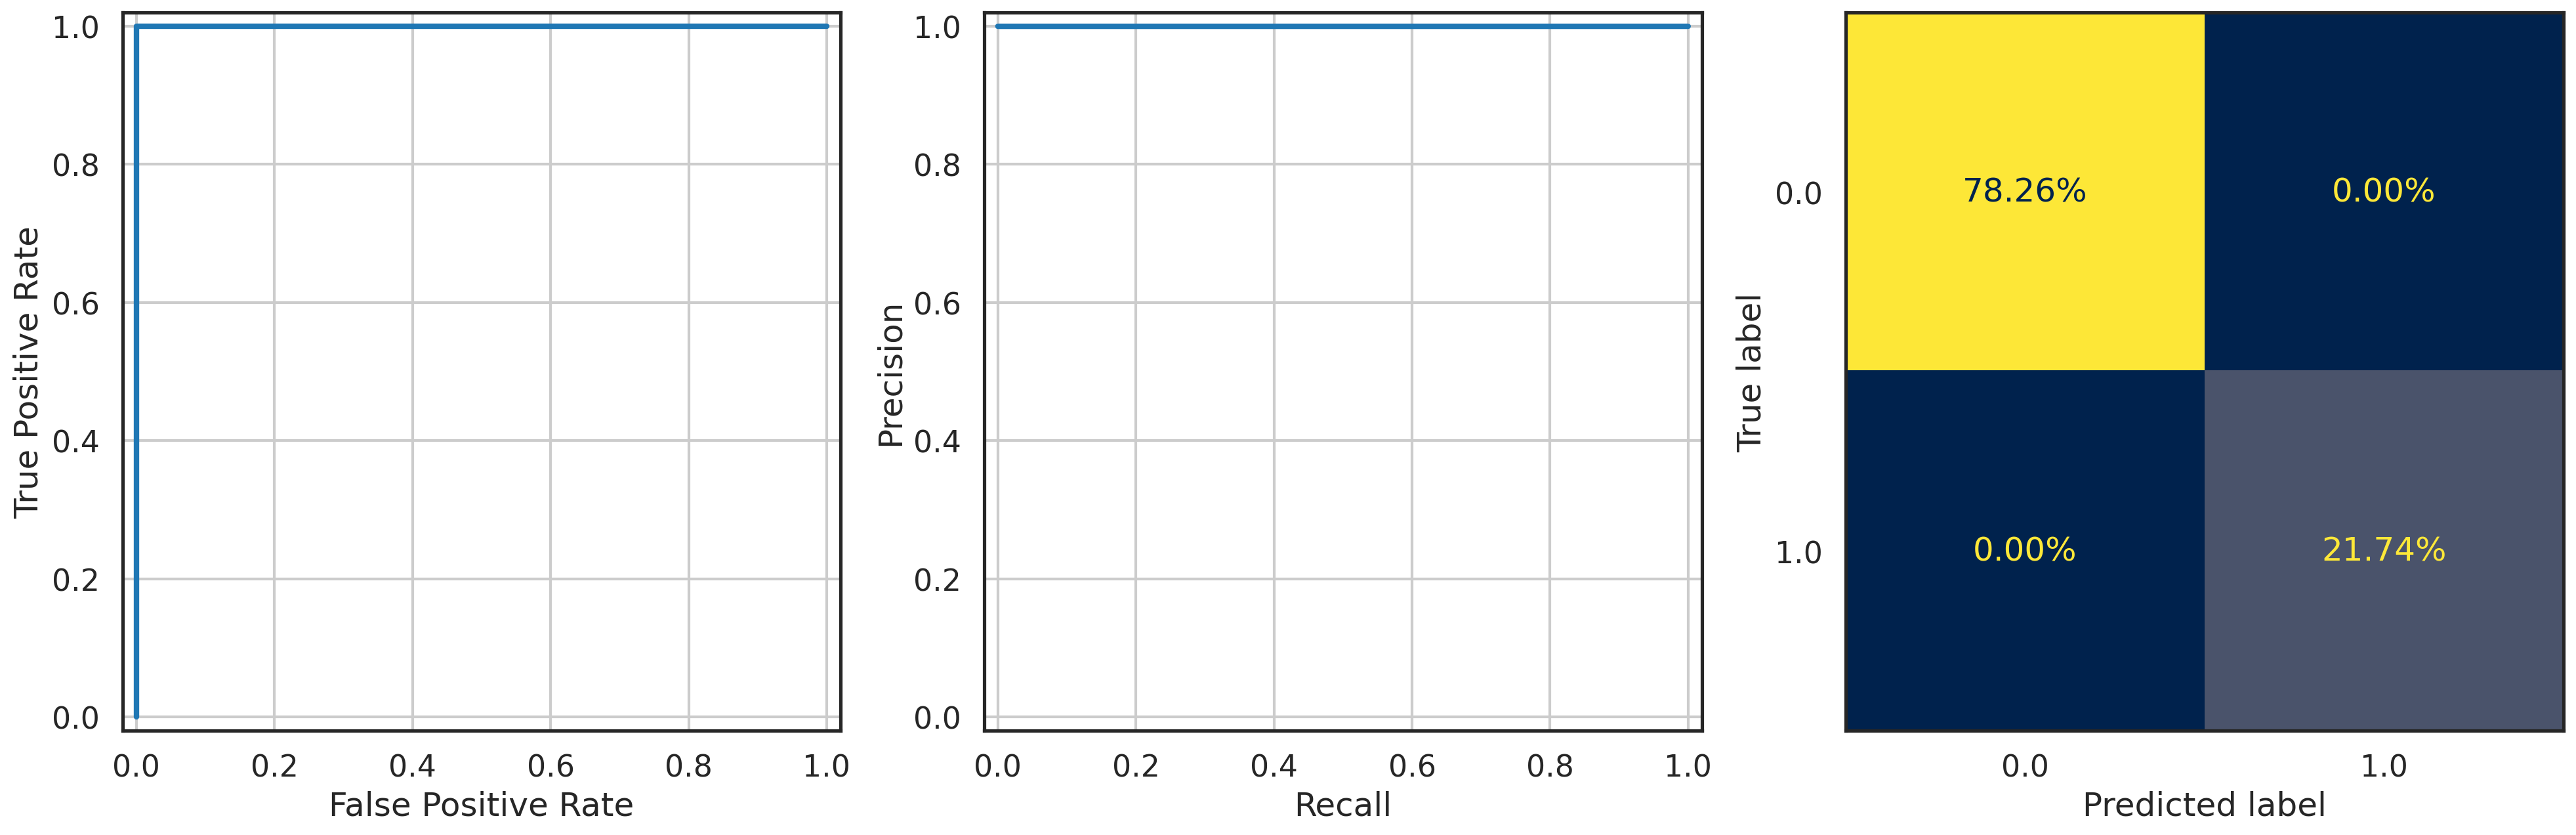

In [32]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good))#, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
#print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))

In [8]:
T.set_printoptions(precision=4)

In [9]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input, trained_reasoner.and_nn(im_mod(input, input)))

tensor([-0.0468,  0.0938, -0.0891,  0.0755,  0.0122,  0.3120,  0.2364, -0.2989,
         0.0610,  0.0005], grad_fn=<SelectBackward0>)
tensor([-0.0104,  0.0961, -0.0574,  0.0237,  0.0211,  0.1843,  0.0953, -0.2309,
         0.0317, -0.0265], grad_fn=<AddBackward0>)


tensor(0.0048, grad_fn=<MseLossBackward0>)

In [10]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(trained_reasoner.bot_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)), trained_reasoner.bot_concept[0]))

tensor([ 0.2364,  0.1212,  0.1365, -0.2411,  0.2960, -0.0989,  0.0372, -0.0187,
        -0.1053, -0.1025], grad_fn=<SelectBackward0>)
tensor([ 0.2236,  0.1235,  0.0876, -0.2277,  0.2582, -0.0745, -0.0065, -0.0296,
        -0.0710, -0.1367], grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<MseLossBackward0>)


In [11]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(input)
print(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)), input))


tensor([-0.2471, -0.1904, -0.0992,  0.1284,  0.1163,  0.0066, -0.3354, -0.0414,
         0.0253, -0.2197], grad_fn=<SelectBackward0>)
tensor([-0.1882, -0.1337, -0.0869,  0.1282,  0.0419,  0.0517, -0.1851, -0.0183,
        -0.0277, -0.0961], grad_fn=<AddBackward0>)
tensor(0.0056, grad_fn=<MseLossBackward0>)


In [12]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(trained_reasoner.bot_concept[0])
output = trained_reasoner.and_nn(im_mod(trained_reasoner.not_nn(input), input))
print(output)
print(F.mse_loss(output, input))


tensor([ 0.2364,  0.1212,  0.1365, -0.2411,  0.2960, -0.0989,  0.0372, -0.0187,
        -0.1053, -0.1025], grad_fn=<SelectBackward0>)
tensor([ 0.1026,  0.0535, -0.0296, -0.2074,  0.1270, -0.0980,  0.0138, -0.0227,
        -0.0609,  0.0463], grad_fn=<AddBackward0>)
tensor(0.0189, grad_fn=<MseLossBackward0>)


In [13]:
print(trained_reasoner.bot_concept[0])
output = trained_reasoner.not_nn(trained_reasoner.top_concept[0])
print(output)
print(F.mse_loss(trained_reasoner.bot_concept[0], output))

tensor([ 0.2364,  0.1212,  0.1365, -0.2411,  0.2960, -0.0989,  0.0372, -0.0187,
        -0.1053, -0.1025], grad_fn=<SelectBackward0>)
tensor([ 0.2652,  0.2210,  0.2398, -0.3619,  0.3748, -0.1905,  0.0592,  0.0172,
        -0.1322, -0.1770], grad_fn=<SqueezeBackward3>)
tensor(0.0059, grad_fn=<MseLossBackward0>)


In [14]:
print(trained_reasoner.top_concept[0])
output = trained_reasoner.not_nn(trained_reasoner.bot_concept[0])
print(output)
print(F.mse_loss(trained_reasoner.top_concept[0], output))

tensor([-0.1175, -0.2765, -0.1397,  0.5055,  0.0894,  0.2828,  0.6925,  0.2093,
        -0.2187,  0.3292], grad_fn=<SelectBackward0>)
tensor([-0.0651, -0.2062, -0.1037,  0.4351,  0.0444,  0.2249,  0.6005,  0.2091,
        -0.1615,  0.3016], grad_fn=<SqueezeBackward3>)
tensor(0.0032, grad_fn=<MseLossBackward0>)


In [15]:
encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input1 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input2 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input3 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

print(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))))
print(trained_reasoner.and_nn(im_mod(trained_reasoner.and_nn(im_mod(input1, input2)), input3)))


F.mse_loss(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))), trained_reasoner.and_nn(im_mod(trained_reasoner.and_nn(im_mod(input1, input2)), input3)))

tensor([ 0.0768, -0.0022,  0.0215, -0.1728,  0.0636, -0.0494, -0.0775, -0.0993,
         0.0153, -0.0197], grad_fn=<AddBackward0>)
tensor([ 0.1116,  0.0167, -0.0333, -0.1124,  0.0936, -0.0280, -0.0623, -0.1047,
         0.0662, -0.0204], grad_fn=<AddBackward0>)


tensor(0.0012, grad_fn=<MseLossBackward0>)

In [16]:
print(trained_reasoner.and_nn(im_mod(input1, input3)))
print(trained_reasoner.and_nn(im_mod(input3, input1)))

F.mse_loss(trained_reasoner.and_nn(im_mod(input1, input3)), trained_reasoner.and_nn(im_mod(input3, input1)))

tensor([ 0.0596, -0.0587, -0.0358, -0.1445,  0.0182, -0.0330, -0.1226, -0.1464,
         0.0583,  0.0334], grad_fn=<AddBackward0>)
tensor([ 0.0451, -0.0632, -0.0436, -0.1287,  0.0361, -0.0400, -0.1508, -0.1728,
         0.0774,  0.0262], grad_fn=<AddBackward0>)


tensor(0.0003, grad_fn=<MseLossBackward0>)

In [17]:
print(input1)
print(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.top_concept[0])))

F.mse_loss(input1, trained_reasoner.and_nn(im_mod(input1, trained_reasoner.top_concept[0])))

tensor([-0.1195, -0.1592,  0.2535, -0.2640, -0.2742,  0.0102, -0.2357, -0.0034,
        -0.1302,  0.1590], grad_fn=<SelectBackward0>)


tensor([-0.1144, -0.1370,  0.1604, -0.1775, -0.2230,  0.0356, -0.1853, -0.0196,
        -0.1138,  0.1325], grad_fn=<AddBackward0>)


tensor(0.0024, grad_fn=<MseLossBackward0>)

In [33]:
import numpy as np
import pandas as pd

# Upewnij się, że Y_te i y_te są numpy array
Y_te_2 = np.array(Y_te_good)
y_te_2 = np.array(y_te)
X_te_2 = np.array(X_te)

# Oblicz błędne predykcje
błędne_predykcje = abs(Y_te_2 - y_te_2) > 0.3

# Wyodrębnij rekordy, na których model popełnił błąd
rekordy_z_błędem = X_te_2[błędne_predykcje, :]

# Połącz rekordy z ich prawdziwymi etykietami i predykcjami
wyniki = pd.DataFrame({
    'Rekord': np.arange(len(X_te_2))[błędne_predykcje],
    'Prawdziwa Etykieta': y_te_2[błędne_predykcje],
    'Predykcja': Y_te_2[błędne_predykcje],
})

content_df = pd.DataFrame(rekordy_z_błędem, columns=[f'Feature_{i}' for i in range(X_te_2.shape[1])])
wyniki = pd.concat([wyniki.reset_index(drop=True), content_df.reset_index(drop=True)], axis=1)

print(wyniki)

Empty DataFrame
Columns: [Rekord, Prawdziwa Etykieta, Predykcja, Feature_0, Feature_1, Feature_2]
Index: []


/tmp/ipykernel_13626/1820175819.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_te_2 = np.array(X_te)
